# POLI 286

## Jan 25

# Matching

## [Matching Methods for Causal Inference](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2943670/)

![f1](./img/f001.png)

## Matching Methods for Causal Inference

![f2](./img/f002.png)

## Matching Methods for Causal Inference by Stuart

Causal inference with observational data: desirable to replicate randomized experiments

> Making treatment and control comparable

Is this possible?

Yes, but it is not that straightforward: several methods and lots of advice.

This paper goes through some of these methods and advice.

## Matching Methods for Causal Inference

### Is matching useful?

In [31]:
library(tidyverse)
set.seed(123)
X = runif(30)
T = numeric()
for (i in 1:30) {
    T[i] = rbinom(1, 1, X[i])
}
Y_0 = - 3 * X + rnorm(30)
Y_1 = 1 + Y_0
Y = T * Y_1 + (1 - T) * Y_0
W = 2 * Y + rnorm(30)
dat = tibble(X, T, Y_0, Y_1, Y, W) |>
  arrange(X) |>
  mutate(ind = 1:30)

## Matching Methods for Causal Inference

### Is matching useful?

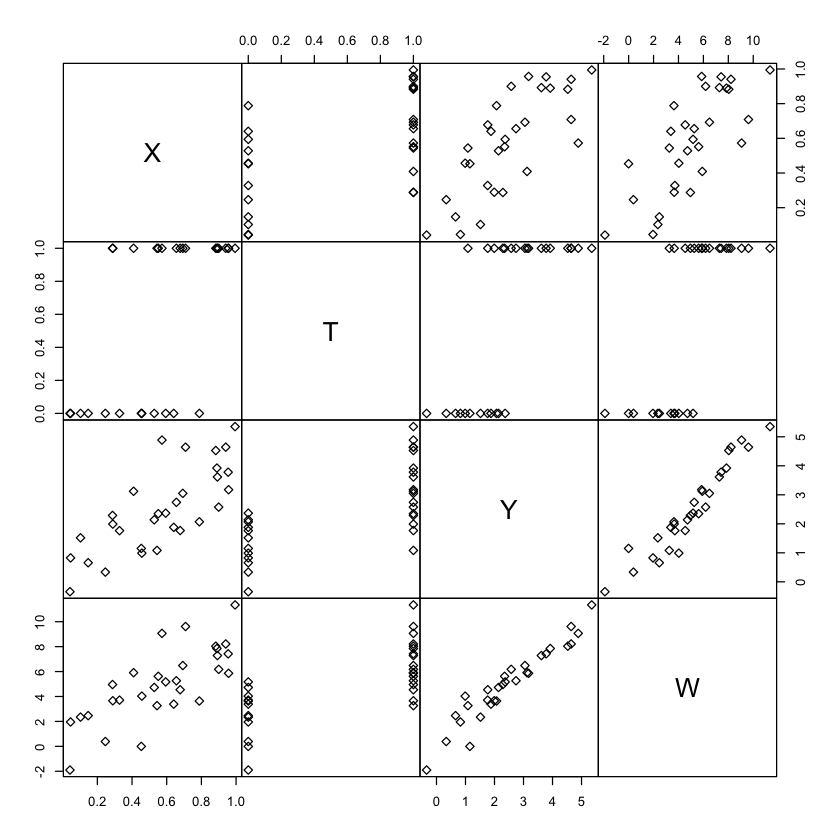

In [29]:
dat |> select(X, T, Y, W) |> pairs(gap = 0, pch = 5)

## Matching Methods for Causal Inference

### Is matching useful?

In [34]:
# No matching
summary(lm(Y ~ T, data = dat))


Call:
lm(formula = Y ~ T, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8624 -0.8273 -0.1351  0.6977  2.4112 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.90690    0.33355  -2.719   0.0111 *
T           -0.05326    0.43061  -0.124   0.9024  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.155 on 28 degrees of freedom
Multiple R-squared:  0.0005462,	Adjusted R-squared:  -0.03515 
F-statistic: 0.0153 on 1 and 28 DF,  p-value: 0.9024


In [35]:
# Confounder mean for treatment and control
print(tapply(dat$X, dat$T, mean))

        0         1 
0.3643893 0.7110741 


## Matching Methods for Causal Inference

### Is matching useful?

In [5]:
View(dat)

X,T,Y_0,Y_1,Y,W,ind
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.04205953,0,-0.5928340,0.40716605,-0.5928340,-2.4063856,1
0.04555650,0,0.5519708,1.55197076,0.5519708,1.4074702,2
0.10292468,0,0.8991880,1.89918795,0.8991880,1.1103673,3
0.14711365,0,-0.2253994,0.77460063,-0.2253994,0.6980089,4
0.24608773,0,-1.1411480,-0.14114804,-1.1411480,-2.5670691,5
0.28757752,1,-0.4362683,0.56373166,0.5637317,1.5071028,6
0.28915974,1,-0.7436250,0.25637503,0.2563750,0.1868185,7
0.32792072,0,-0.2037970,0.79620296,-0.2037970,-0.2262906,8
0.40897692,1,-0.3318051,0.66819490,0.6681949,1.0031824,9


## Matching Methods for Causal Inference

### Is matching useful?

In [6]:
dat_match <- dat[c(5, 6, 7, 8, 9, 10, 12, 13, 15, 16, 17, 18, 21, 22),]
summary(lm(Y ~ T, dat_match))


Call:
lm(formula = Y ~ T, data = dat_match)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.1747 -0.4702  0.2583  0.5268  1.4573 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  -1.3951     0.3915  -3.563   0.0039 **
T             1.3888     0.5537   2.508   0.0275 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.036 on 12 degrees of freedom
Multiple R-squared:  0.3439,	Adjusted R-squared:  0.2893 
F-statistic: 6.291 on 1 and 12 DF,  p-value: 0.0275


In [7]:
# Confounder mean for treatment and control
print(tapply(dat_match$X, dat_match$T, mean))

        0         1 
0.5112003 0.4952357 


## Matching Methods for Causal Inference

***What is matching?***

> We define “matching” broadly to be any method that aims to equate (or “balance”) the distribution of covariates in the treated and control groups. (p.1)

Does not buy identification!

## Matching Methods for Causal Inference

***Why matching?***

1. Select subjects to follow: specially, select control group subjects

1. Reduce bias in estimation of the treatment effect.

## Matching Methods for Causal Inference

***Natural use of matching?***

We collected some covariates, apply some treatment, and now want to estimate the effect of the treatment in some outcome.

Note the order: covariates -> treatment -> outcome

1. We do not use matching on outcomes

1. We do not use matching on post-treatment variables

## Matching Methods for Causal Inference

**Assumption**: Strong Ignorability ([Rosenbaum and Rubin (1983)](https://doi.org/10.1093/biomet/70.1.41))

1. CIA

$$ T \perp \bigg(Y_i(0), Y_i(1)\bigg) | X $$

2. Positivity

$$ 0 < P(T = 1| X) < 1 $$

## Matching Methods for Causal Inference

**How to match?**

1. Choose metric and matching variables
1. Implement the matching
1. Check quality of the matching
1. Analyze the outcome

## Matching Methods for Causal Inference

### Choose metric and matching variables

**Matching variables**: Because the **Ignorability** assumption, suggestion is to use all variables.

*Question:* Is this feasible? When? When not?

*Question:* How to do that when having multiple variables?

## Matching Methods for Causal Inference

### Choose metric and matching variables

**Metrics**: What did we do by hand? Selected cases based on "how close the numbers were," right?

*Question:* What does it mean to be close?

- [Metrics](https://en.wikipedia.org/wiki/Metric_space): not a trivial problem!

## Matching Methods for Causal Inference

### Choose metric and matching variables

**Metrics**:

![fig](./img/f003.png)

## Matching Methods for Causal Inference

### Choose metric and matching variables

**Metrics**:

![fig](./img/f004.png)

## Matching Methods for Causal Inference

### Choose metric and matching variables

**Metrics**:

![fig](./img/f005.png)

Where $e_k(X_k) = P(T_k = 1 | X_k)$.

## Matching Methods for Causal Inference

### Choose metric and matching variables

**Metrics**:

![fig](./img/f006.png)

Where, again, $e_k(X_k) = P(T_k = 1 | X_k)$.

## Matching Methods for Causal Inference

### Implementing the Matching

What methods to choose?

The methods vary in terms of:

1. Individuals they choose
1. Relative weight that individuals receive (or maybe just that...)

## Matching Methods for Causal Inference

### Implementing the Matching

**Nearest-Neighbor Matching**: Pretty much what we did by hand.

- You can do 1:1 or k:1.

- Always the ATT (removes unmatched control units)

## Matching Methods for Causal Inference

### Implementing the Matching

**Optimal Matching**: Look at the entire set of matches and minimizes the global covariate distance

**Ratio Matching**: Choose how many individuals will match each other (good for large control groups)

## Matching Methods for Causal Inference

### Implementing the Matching

**Subclassification**: Group individuals with similar characteristics (ATT and ATE).

**Full Matching**: Group all individuals (ATE and ATT).

## Matching Methods for Causal Inference

### Implementing the Matching

**IPTW** (Inverse Probability of Treatment Weight):

$$w_i = \dfrac{T_i}{\hat{e}_i} + \dfrac{1-T_i}{1-\hat{e}_i}$$

**Odd Weights**:

$$w_i = T_i + (1-T_i)\dfrac{\hat{e}_i}{1-\hat{e}_i}$$

## Matching Methods for Causal Inference

### Implementing the Matching

**Assumption** (Common Support): There is overlap between the propensity score distribution in the two groups. Differences come from density differences.

See [King and Zeng (2006)](https://www.cambridge.org/core/journals/political-analysis/article/dangers-of-extreme-counterfactuals/2E70ACE0D50C6D51A1E042DFBB1BC335) about this.

## Matching Methods for Causal Inference

### Quality of the Matching

**Standardized Bias**: 

$$\dfrac{\overline{X}_{T=1}-\overline{X}_{T=0}}{\sigma_{T=1}}$$

**Ratio of Variances**: of the propensity scores in treatment and control.

**Hypothesis testing**?

## Matching Methods for Causal Inference

### Quality of the Matching

**Hypothesis testing**: Not appropriate. Against what are you testing the balance?

> First, balance is inherently an in-sample property, without reference to any broader population or super-population. (p.11)

> Second, hypothesis tests can be misleading as measures of balance, because they often conflate changes in balance with changes in statistical power. (p.11)

***Corollary:*** p-values and hypothesis testing are not appropriate to choose matching methods (weird trade-offs between type I and type II errors).

## Matching Methods for Causal Inference

### Outcome analysis

Matching methods do not estimate causal effect. They help you to estimate it.

**NN Matching**: pool selected and then

- 1:1 matching: just run a regression
- k:1 matching: just run a regression (if worried, condition on variables in the matching process)

**Full Matching and Subclassification**: Run, for all subclasses $j$ used

$$Y_{ij} = \alpha_{j} + \beta_{j}T_{ij} + \gamma X_{ij} + e_{ij}$$

And then: 

$$\beta = \sum_{j=1}^{J}\dfrac{N_j}{N}\beta_{j}$$

**Others**: Regression using weights / covariates (but there are exact formulas)

## Matching Methods for Causal Inference

### Outcome analysis (thinking about the estimand)

**ATE**: IPTW or full matching

**ATT**: k:1 NN w.o. replacement; subclassification; odds matching; full matching

## Matching Methods for Causal Inference

### Other topics

**Missing Covariates**: Multiple imputation or naïve imputation + dummy for missing.

**Ignorability**: Placebo tests or sensitivity to covariate needed to kill the results (Rosenbaum and Rubin 1983; Cinelli and Hazlet, 2020)

## Matching Methods for Causal Inference

### Other topics

**Which methods**:

> (1) the method that yields the smallest standardized difference of means across the largest number of covariates

> (2) the method that minimizes the standardized difference of means of a few particularly prognostic covariates

> (3) the method that results in the fewest number of “large” standardized differences of means (greater than 0.25). (p.15)

**Dosage**: Generalized propensity score.

# Multilevel regression and post-stratification

## [Getting the most out of surveys by Ornstein](https://link.springer.com/chapter/10.1007/978-3-031-12982-7_5#Sec2)

![fig](./img/f007.png)

## [Getting the most out of surveys by Ornstein](https://link.springer.com/chapter/10.1007/978-3-031-12982-7_5#Sec2)

![fig](./img/f008.png)

## Getting the most out of surveys

> How to take unrepresentative survey data and adjust it so that it is useful for our particular research question. 

**Multilevel regression and poststratification** (MRP): 

1. Model of public opinion (multilevel regression)

2. Reweights the model's predictions based on the observed characteristics of the population of interest (poststratification).

## Getting the most out of surveys

Running example in the paper 2020 CES data. The slides for the paper are [here](https://github.com/joeornstein/mrp-chapter/blob/main/slides/mrp-slides.Rmd)

In [8]:
library(modelsummary)
load(url('https://github.com/joeornstein/mrp-chapter/raw/main/data/CES-2020-All.RData?raw=true'))

In [9]:
names(ces)

[1] "caseid"             "gender"             "educ"              
 [4] "race"               "age"                "age_cat"           
 [7] "abb"                "division"           "pew_religimp"      
[10] "homeowner"          "urban"              "parent"            
[13] "military_household" "defund_police"      "homicide_rate"     
[16] "biden_vote_share"

In [10]:
dim(ces)

[1] 60283    16

In [11]:
target <- ces |> 
  group_by(abb) |> 
  summarize(pct_support = mean(defund_police),
            num_respondents = n())

head(target)

abb,pct_support,num_respondents
<chr>,<dbl>,<int>
AL,0.3743372,943
AR,0.4026217,534
AZ,0.3927098,1454
CA,0.4798403,5010
CO,0.4674221,1059
CT,0.4053208,639


## Getting the most out of surveys

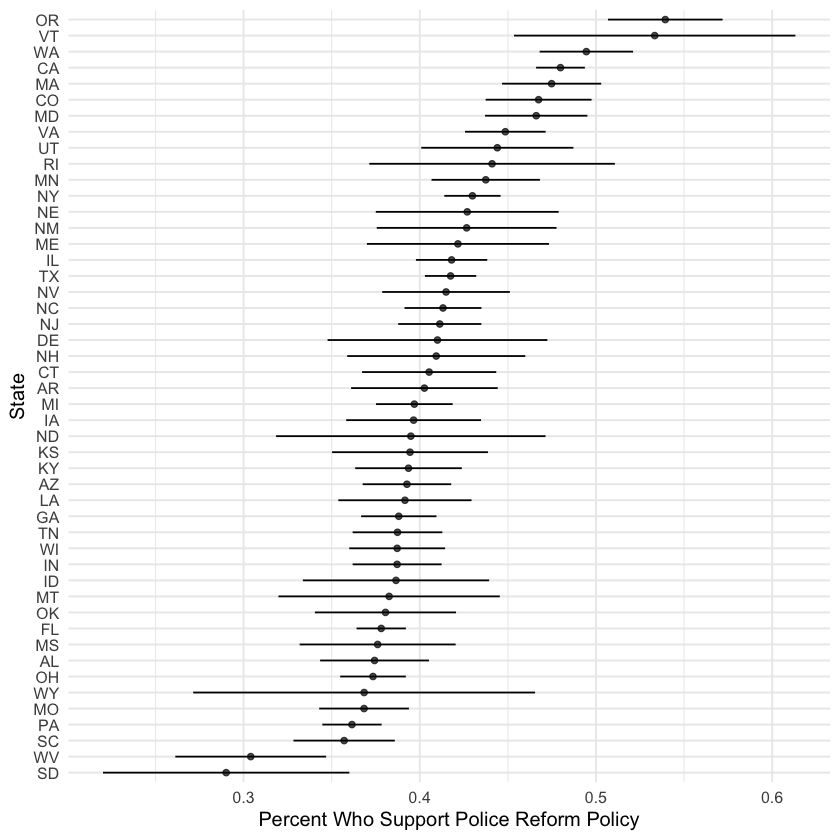

In [12]:
# State level
p <- ces |> 
  group_by(abb) |> 
  summarize(pct_support = mean(defund_police),
            num_respondents = n()) |>
  mutate(conf_low = pct_support - 1.96*sqrt(pct_support*(1-pct_support)/num_respondents),
         conf_high = pct_support + 1.96*sqrt(pct_support*(1-pct_support)/num_respondents)) |> 
  mutate(abb = fct_reorder(abb, pct_support)) |> 
  ggplot(mapping = aes(x=pct_support, y=abb)) +
  geom_point(alpha = 0.7) +
  geom_linerange(mapping = aes(y = abb, xmin = conf_low,
                               xmax = conf_high)) +
  labs(x = 'Percent Who Support Police Reform Policy',
       y = 'State') +
  theme_minimal(base_size = 12)
p

## Getting the most out of surveys

And to run an MRP, we will draw a sample:

In [13]:
ces_sample <- ces |> 
  slice_sample(n=3000)

sample_summary <- ces_sample  |>  
  group_by(abb) |>  
  summarize(estimate = mean(defund_police),
            num_respondents = n())

head(sample_summary)

abb,estimate,num_respondents
<chr>,<dbl>,<int>
AL,0.3513514,37
AR,0.3200000,25
AZ,0.3606557,61
CA,0.4689922,258
CO,0.4791667,48
CT,0.4516129,31


## Getting the most out of surveys

But look how bad our sample is:

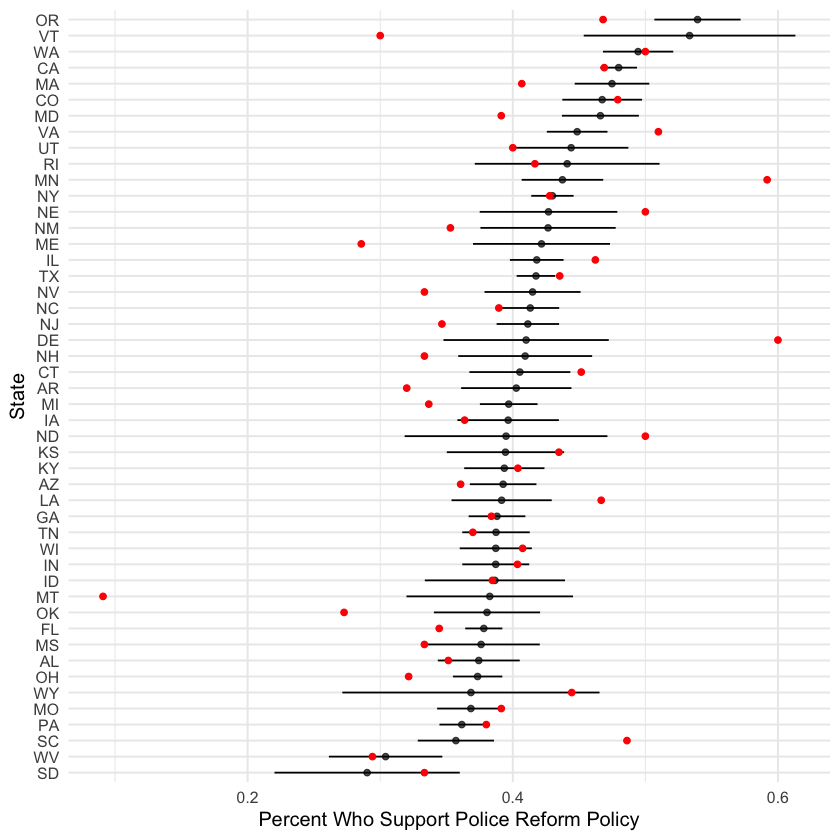

In [14]:
p + geom_point(data = sample_summary,
             mapping = aes(x=estimate,
                           y=abb),
             color = 'red')

## Getting the most out of surveys

**Question**: Is there a way to, from the sample (red dots) recover (or at least get closer to) the population results?

This is what we do in Multilevel Regression and Poststratification.

## Getting the most out of surveys

### Multilevel Regression

Suppose you had to guess the average height of this group of children:

- Marco (male, 72 months old)

- Roberto (male, 54 months old)

- Anna (female, 60 months old)

- Maria (female, 80 months old)

- Luca (male, 36 months old)

How would you approach this problem?

## Getting the most out of surveys

### Step 1: Fit a Model

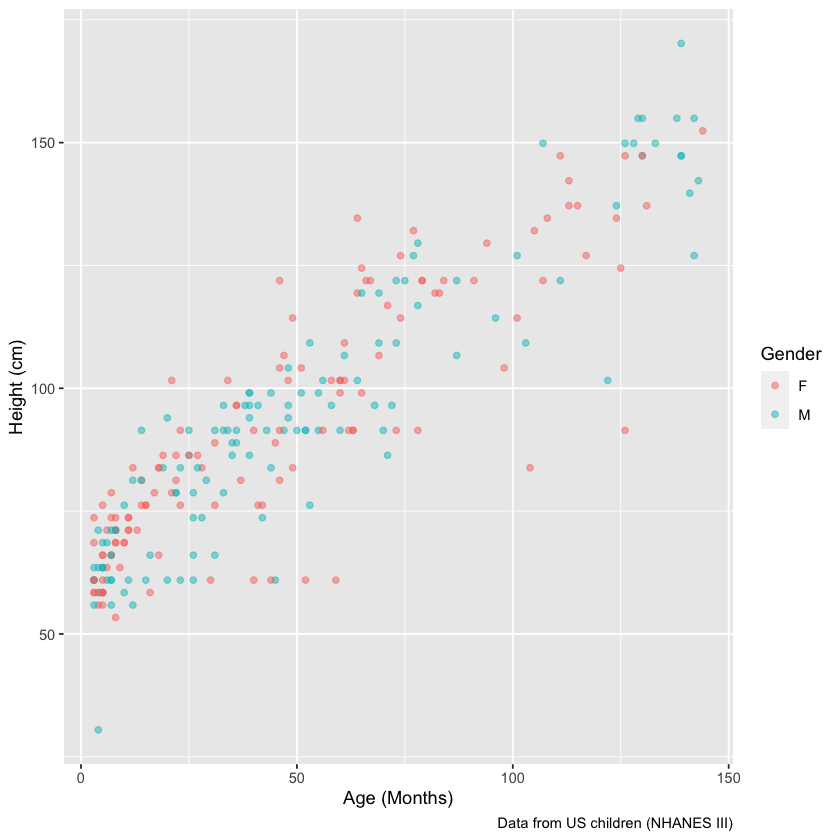

In [15]:
d <- UsingR::kid.weights |> 
  mutate(height = height * 2.54)

p <- ggplot(data = d,
       mapping = aes(x=age, y=height, color = gender)) +
  geom_point(alpha = 0.5) +
  labs(x = 'Age (Months)', y = 'Height (cm)',
       color = 'Gender',
       caption = 'Data from US children (NHANES III)')

p

## Getting the most out of surveys

### Fit a model

$$\text{Height}_i = \beta_0 + \text{Age}_i\beta_{1} + \text{Gender}_i\beta_{2} + \varepsilon_i$$


In [16]:
mod <- lm(height ~ age + gender, data = d)
print(mod$coefficients)

(Intercept)         age     genderM 
 63.7516508   0.6118978  -0.6610833 


And thus:

$$\text{Height}_i = 63.75 + \text{Age}_i\times 0.612 - \text{Gender}_i\times 0.661 + \varepsilon_i$$

## Getting the most out of surveys

### Fit a model

$$\text{Height}_i = 63.75 + \text{Age}_i\times 0.612 - \text{Gender}_i\times 0.661 + \varepsilon_i$$

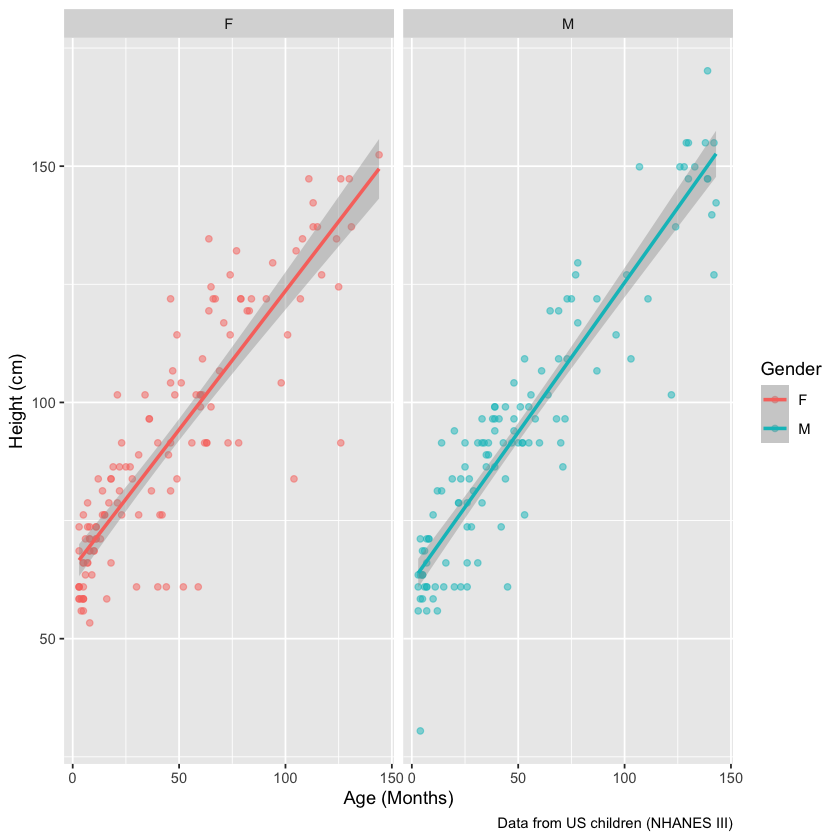

In [17]:
p + facet_wrap(~gender) +
  geom_smooth(method = 'lm', formula = 'y ~ x')

## Getting the most out of surveys

### Use the model to make predictions and post-stratify

$$\text{Height}_i = 63.75 + \text{Age}_i\times 0.612 - \text{Gender}_i\times 0.661 + \varepsilon_i$$

- Marco (male, 72 months old): 63.75 + 0.612 $\times$ 72 - 0.661 = **107.1**

- Roberto (male, 54 months old): 63.75 + 0.612 $\times$ 54 - 0.661 = **96.1**

- Anna (female, 60 months old): 63.75 + 0.612 $\times$ 60 = **112.7**

- Maria (female, 80 months old): 63.75 + 0.612 $\times$ 80 = **112.7**

- Luca (male, 36 months old): 63.75 + 0.612 $\times$ 36 - 0.661 = **85.1**


## Getting the most out of surveys

### Use the model to make predictions and post-stratify

And the predicted average is:

In [18]:
(107.1 + 96.1 + 100.5 + 112.7 + 85.1) / 5

[1] 100.3

*Everything else is refinements:* making the first-stage model more complex or different ways of generating the poststratification frame.

## Getting the most out of surveys

### Police reform example

In [19]:
names(ces_sample)

[1] "caseid"             "gender"             "educ"              
 [4] "race"               "age"                "age_cat"           
 [7] "abb"                "division"           "pew_religimp"      
[10] "homeowner"          "urban"              "parent"            
[13] "military_household" "defund_police"      "homicide_rate"     
[16] "biden_vote_share"

## Getting the most out of surveys

### Police reform example (fit)

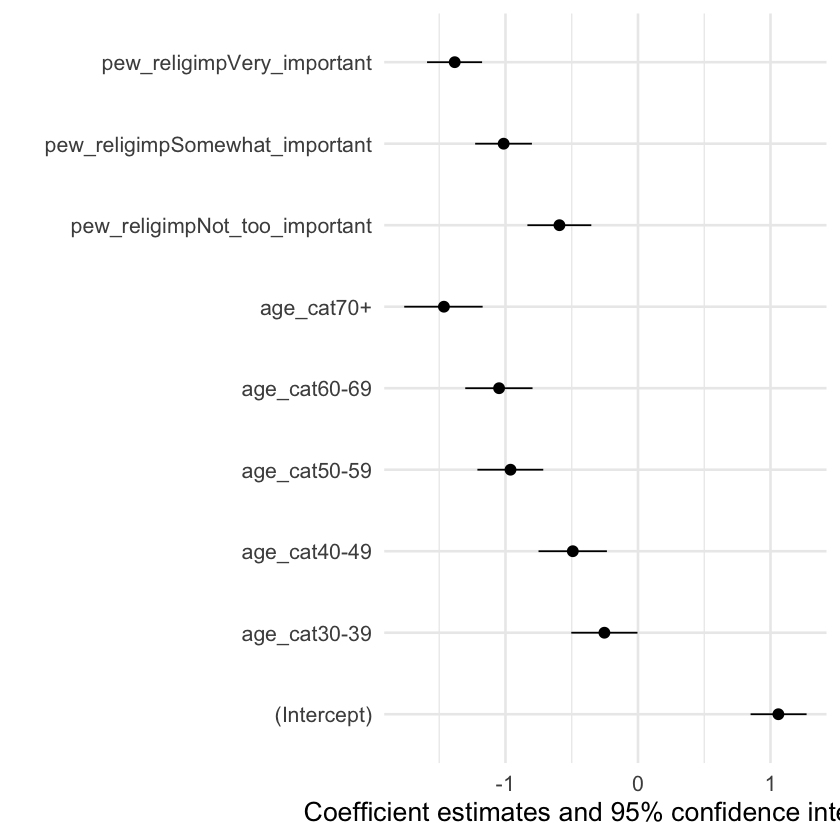

In [20]:
model1 <- glm(defund_police ~ age_cat + pew_religimp,
              family = 'binomial',
              data = ces_sample)
modelplot(model1) +
  theme_minimal(base_size = 16)

## Getting the most out of surveys

### Police reform example (post-stratify)

In [21]:
psframe <- ces |> 
  count(abb, age_cat, pew_religimp)

psframe

abb,age_cat,pew_religimp,n
<chr>,<chr>,<chr>,<int>
AL,18-29,Not_at_all_important,35
AL,18-29,Not_too_important,30
AL,18-29,Somewhat_important,70
AL,18-29,Very_important,70
AL,30-39,Not_at_all_important,36
AL,30-39,Not_too_important,19
AL,30-39,Somewhat_important,34
AL,30-39,Very_important,82
AL,40-49,Not_at_all_important,29


## Getting the most out of surveys

### Police reform example (post-stratify)

In [22]:
psframe$predicted_probability <- predict(model1, psframe, type = 'response')

psframe

abb,age_cat,pew_religimp,n,predicted_probability
<chr>,<chr>,<chr>,<int>,<dbl>
AL,18-29,Not_at_all_important,35,0.7425726
AL,18-29,Not_too_important,30,0.6145543
AL,18-29,Somewhat_important,70,0.5113925
AL,18-29,Very_important,70,0.4197671
AL,30-39,Not_at_all_important,36,0.6912269
AL,30-39,Not_too_important,19,0.5530436
AL,30-39,Somewhat_important,34,0.4482007
AL,30-39,Very_important,82,0.3595654
AL,40-49,Not_at_all_important,29,0.6381567


## Getting the most out of surveys

### Police reform example (post-stratify)

In [23]:
mrp <- psframe |> 
  group_by(abb) |> 
  summarize(estimate = weighted.mean(predicted_probability, n))

head(mrp)

abb,estimate
<chr>,<dbl>
AL,0.3783111
AR,0.3788665
AZ,0.3969857
CA,0.4365494
CO,0.4261654
CT,0.4209024


## Getting the most out of surveys

### MRP results

In [24]:
p <- target |> 
  mutate(conf_low = pct_support - 1.96*sqrt(pct_support*(1-pct_support)/num_respondents),
         conf_high = pct_support + 1.96*sqrt(pct_support*(1-pct_support)/num_respondents)) |> 
  mutate(abb = fct_reorder(abb, pct_support)) |> 
  ggplot(mapping = aes(x=pct_support, y=abb)) +
  geom_point(alpha = 0.7) +
  geom_linerange(mapping = aes(y = abb, xmin = conf_low,
                               xmax = conf_high)) +
  labs(x = 'Percent Who Support Police Reform Policy',
       y = 'State') + 
  geom_point(data = sample_summary,
             mapping = aes(x=estimate,
                           y=abb),
             color = 'red') +
  geom_point(data = mrp,
             mapping = aes(x=estimate,
                           y=abb),
             color = 'blue') +
  theme_minimal(base_size = 12)

## Getting the most out of surveys

### MRP results

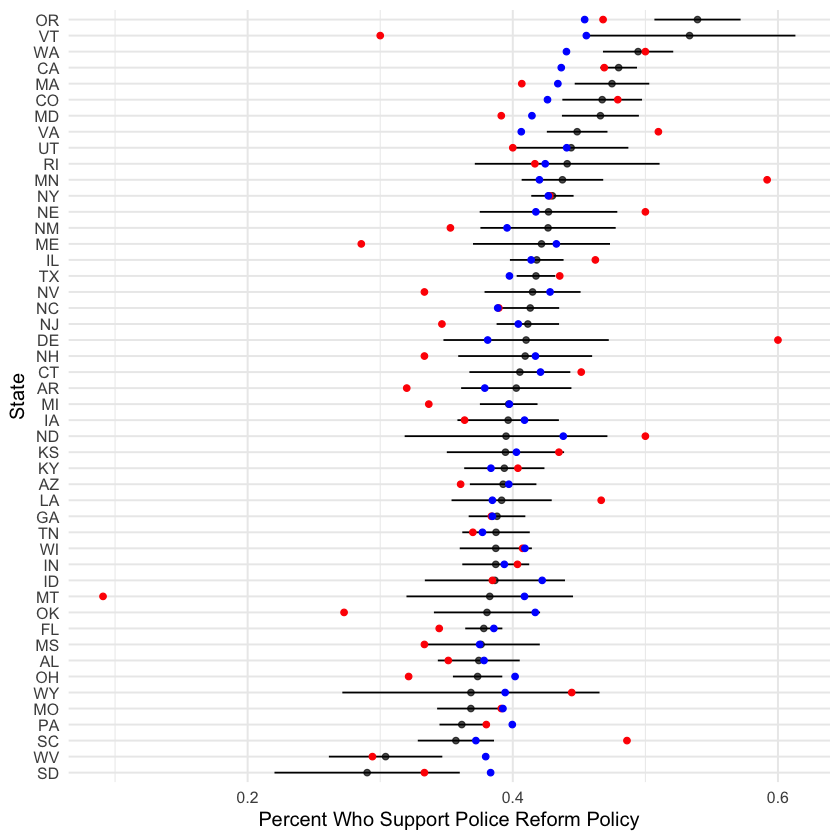

In [25]:
p

## Getting the most out of surveys

The rest is making the model better!

- Better first stage

- Better post-stratification techniques

Advice:

1. Be careful with overfitting
1. Be careful with extrapolations

# New in Political Methodology